<h1 style="color:blue;">Cost &amp; Loss Functions in Machine Learning</h1>

Loss (or cost) functions measure how far predictions are from the actual values.  
They guide the optimizer during training.  

In this notebook, we’ll cover:  
- Mean Absolute Error (MAE)  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Hinge Loss  
- Binary Cross-Entropy  
- Categorical Cross-Entropy  
(with **plots** to visualize their behavior)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
 

<h2 style="color:darkgreen;">1. Mean Absolute Error (MAE)</h2>


MAE is the average absolute difference between predictions and true values.  
It grows **linearly** with the error.


MAE: 0.75


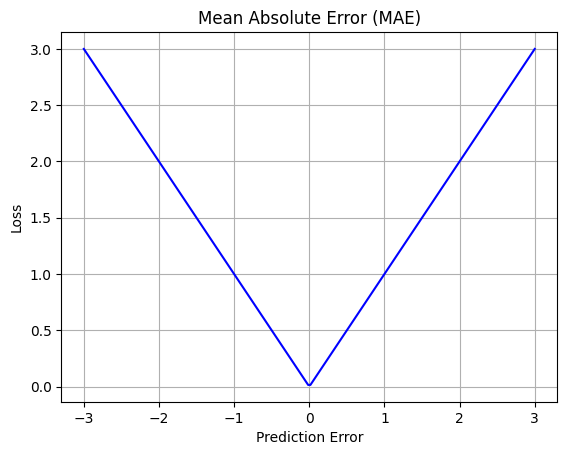

In [11]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example
y_true = np.array([1, 2, 3, 4])
y_pred = np.array([2, 2, 4, 3])
print("MAE:", mae(y_true, y_pred))

# Visualization
errors = np.linspace(-3, 3, 200)
mae_loss = np.abs(errors)

plt.plot(errors, mae_loss, color="blue")
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Prediction Error")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


<h2 style="color:darkgreen;">2. Mean Squared Error (MSE)</h2>

MSE squares the errors before averaging.  
It **penalizes larger mistakes more strongly** than MAE.


MSE: 0.75


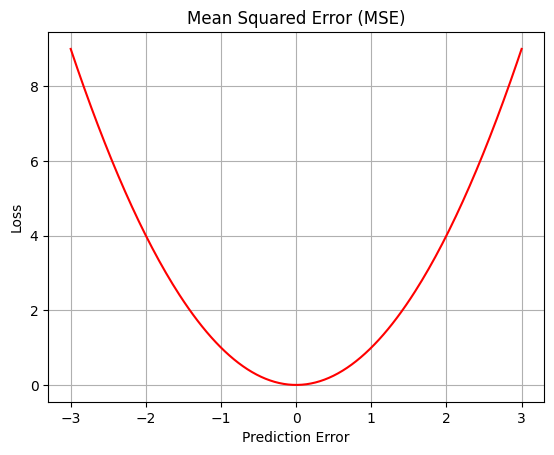

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

print("MSE:", mse(y_true, y_pred))

mse_loss = errors**2
plt.plot(errors, mse_loss, color="red")
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Prediction Error")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

<h2 style="color:darkgreen;">3. Root Mean Squared Error (RMSE)</h2>

RMSE is the square root of MSE.  
It penalizes larger errors and keeps units consistent with target values.


RMSE: 0.8660254037844386


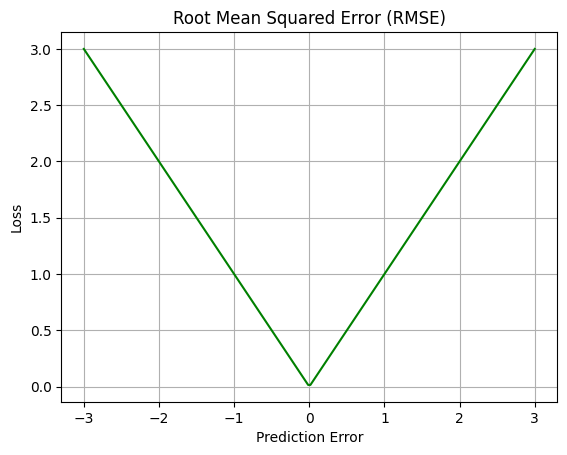

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

print("RMSE:", rmse(y_true, y_pred))

rmse_loss = np.sqrt(errors**2)
plt.plot(errors, rmse_loss, color="green")
plt.title("Root Mean Squared Error (RMSE)")
plt.xlabel("Prediction Error")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

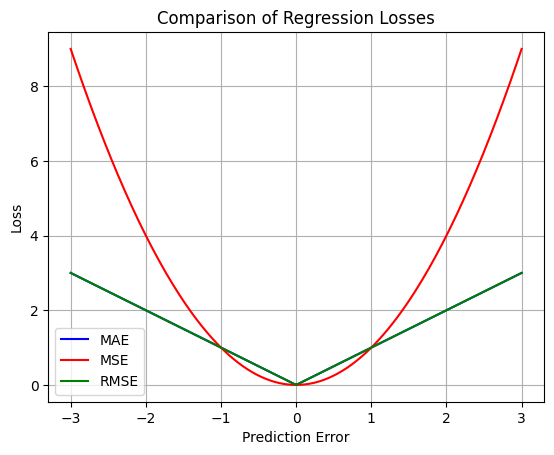

In [16]:
plt.plot(errors, mae_loss, label="MAE", color="blue")
plt.plot(errors, mse_loss, label="MSE", color="red")
plt.plot(errors, rmse_loss, label="RMSE", color="green")
plt.title("Comparison of Regression Losses")
plt.xlabel("Prediction Error")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


<h2 style="color:darkgreen;">4. Hinge Loss</h2>

Hinge Loss is used in **Support Vector Machines (SVMs)**.  
It enforces a margin: correct predictions outside the margin have zero loss,  
while wrong ones are penalized linearly.


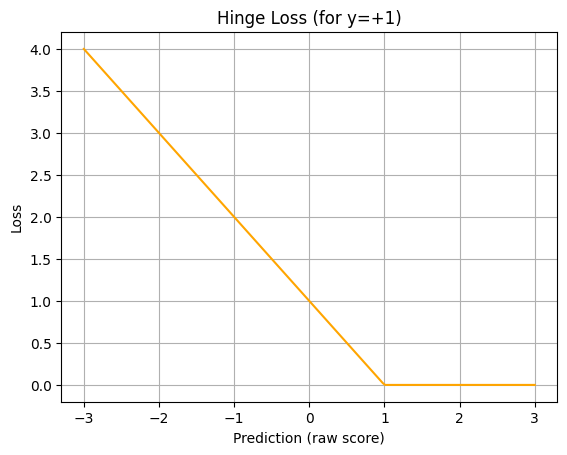

In [18]:
def hinge(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

# Example for y=+1
y_true = 1
hinge_loss = np.maximum(0, 1 - y_true * errors)

plt.plot(errors, hinge_loss, color="orange")
plt.title("Hinge Loss (for y=+1)")
plt.xlabel("Prediction (raw score)")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


<h2 style="color:darkgreen;">5. Binary Cross-Entropy (Log Loss)</h2>

Used for **binary classification**.  
The loss increases sharply when the model is confident but wrong.


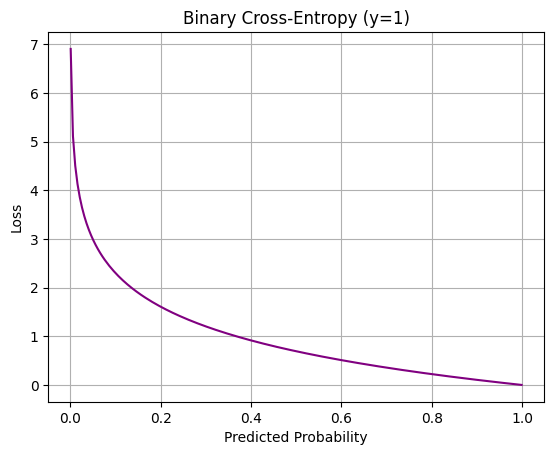

In [20]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

# Example visualization (y=1)
p = np.linspace(0.001, 0.999, 200)
bce_loss = -(1*np.log(p) + (0)*np.log(1-p))

plt.plot(p, bce_loss, color="purple")
plt.title("Binary Cross-Entropy (y=1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

<h2 style="color:darkgreen;">6. Categorical Cross-Entropy</h2>

Used for **multi-class classification**.  
It penalizes the negative log probability of the correct class.


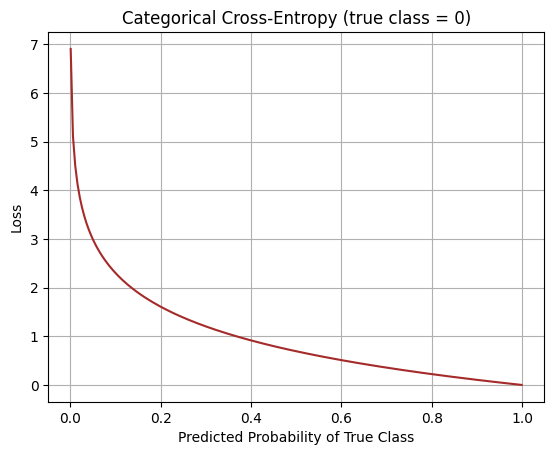

In [21]:
def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Example (true class = 0)
p = np.linspace(0.001, 0.999, 200)
cce_loss = -np.log(p)

plt.plot(p, cce_loss, color="brown")
plt.title("Categorical Cross-Entropy (true class = 0)")
plt.xlabel("Predicted Probability of True Class")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


<h2 style="color:purple;">📌 Key Takeaways</h2>

| Loss Function               | Behavior & Use Case                         |
|-----------------------------|----------------------------------------------|
| **MAE**                     | Linear growth, robust to outliers           |
| **MSE**                     | Quadratic growth, penalizes big errors more |
| **RMSE**                    | Same units as target, interpretable         |
| **Hinge Loss**              | Margin-based, SVMs                          |
| **Binary Cross-Entropy**    | Binary classification (probabilities)       |
| **Categorical Cross-Entropy** | Multi-class classification                |
